In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

228818944/228813984 [==============================] - 1s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib

In [ ]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))

In [ ]:
roses[:5]

[PosixPath('datasets/flower_photos/roses/5990626258_697f007308_n.jpg'),
 PosixPath('datasets/flower_photos/roses/505517255_cfbb6f6394.jpg'),
 PosixPath('datasets/flower_photos/roses/218630974_5646dafc63_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3072908271_08764c732a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15104537437_f6730b38c3_n.jpg')]

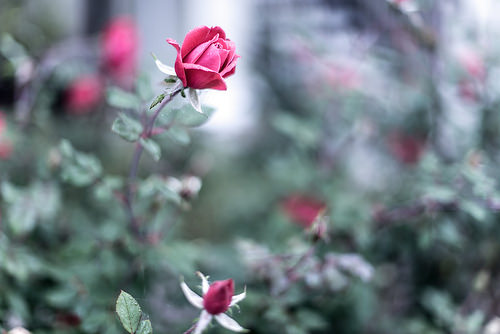

In [ ]:
PIL.Image.open(str(roses[5]))

In [ ]:
tulips = list(data_dir.glob('tulips/*'))

In [ ]:
tulips[:4]

[PosixPath('datasets/flower_photos/tulips/54895006_55b49052dc.jpg'),
 PosixPath('datasets/flower_photos/tulips/3614805920_7a6610aa4b_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/4574785121_5d8ec4626e.jpg'),
 PosixPath('datasets/flower_photos/tulips/7070694881_e9a331fa4e_n.jpg')]

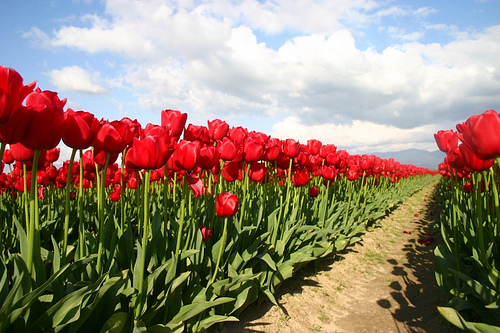

In [ ]:
PIL.Image.open(str(tulips[0]))

In [ ]:
flowers_img_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'tulips':list(data_dir.glob('tulips/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'daisy':list(data_dir.glob('daisy/*')),
}

In [ ]:
flowers_img_dict['roses']

[PosixPath('datasets/flower_photos/roses/5990626258_697f007308_n.jpg'),
 PosixPath('datasets/flower_photos/roses/505517255_cfbb6f6394.jpg'),
 PosixPath('datasets/flower_photos/roses/218630974_5646dafc63_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3072908271_08764c732a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15104537437_f6730b38c3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16155980245_6ab8d7b888.jpg'),
 PosixPath('datasets/flower_photos/roses/14107161906_5737e0e4ec.jpg'),
 PosixPath('datasets/flower_photos/roses/15202632426_d88efb321a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2347579838_dd6d2aaefc_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8590442797_07fa2141c0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/563847503_89e9756c80.jpg'),
 PosixPath('datasets/flower_photos/roses/3713368809_eba7fa2fbf_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3102535578_ec8c12a7b6_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg')

In [ ]:
flowers_img_dict['daisy']

[PosixPath('datasets/flower_photos/daisy/3861452393_14d2f95157_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/15327813273_06cdf42210.jpg'),
 PosixPath('datasets/flower_photos/daisy/4993492878_11fd4f5d12.jpg'),
 PosixPath('datasets/flower_photos/daisy/8348621545_8f02b82662_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3336704121_cfeb67a7d7.jpg'),
 PosixPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 PosixPath('datasets/flower_photos/daisy/9146733107_98b15d3892_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/6480809771_b1e14c5cc2_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/7633425046_8293e3d0e9_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/4258408909_b7cc92741c_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/2632216904_274aa17433.jpg'),
 PosixPath('datasets/flower_photos/daisy/12701063955_4840594ea6_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/4837182901_69a6cc782b_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3639009391_0f910681b7.jpg'),
 

In [ ]:



flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
str(flowers_img_dict['roses'][0])

'datasets/flower_photos/roses/5990626258_697f007308_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_img_dict['roses'][0]))

In [ ]:
img.shape

(240, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
x,y = [],[]

for flower_name, images in flowers_img_dict.items():
    #print(flower_name)
    #print(len(images))
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
x[0]

array([[[ 14,  23,  37],
        [ 17,  24,  40],
        [ 32,  39,  58],
        ...,
        [ 25,  62,  93],
        [ 39,  82, 110],
        [ 39,  79, 111]],

       [[ 23,  32,  49],
        [ 21,  30,  48],
        [ 31,  39,  59],
        ...,
        [ 39,  81, 102],
        [ 32,  81, 103],
        [ 54, 101, 127]],

       [[ 27,  36,  56],
        [ 27,  36,  58],
        [ 31,  41,  63],
        ...,
        [ 38,  75,  98],
        [ 63, 105, 128],
        [ 66, 104, 128]],

       ...,

       [[140, 154, 145],
        [163, 178, 171],
        [124, 138, 127],
        ...,
        [ 54,  87, 167],
        [ 52,  85, 164],
        [ 52,  86, 162]],

       [[124, 139, 152],
        [155, 176, 177],
        [120, 131, 145],
        ...,
        [ 51,  84, 164],
        [ 52,  85, 165],
        [ 54,  88, 163]],

       [[123, 150, 156],
        [ 79, 115, 121],
        [ 94, 102, 127],
        ...,
        [ 54,  86, 166],
        [ 55,  88, 167],
        [ 51,  86, 160]]

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
len(x_train)

2752

In [ ]:
len(x_test)

918

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
x_train_scaled[0]

array([[[0.06666667, 0.10980392, 0.11372549],
        [0.04313725, 0.09019608, 0.10196078],
        [0.14901961, 0.2       , 0.21568627],
        ...,
        [0.05882353, 0.07843137, 0.09019608],
        [0.02352941, 0.03921569, 0.04705882],
        [0.04705882, 0.03921569, 0.03921569]],

       [[0.10588235, 0.18039216, 0.17647059],
        [0.12156863, 0.19215686, 0.19607843],
        [0.14117647, 0.21568627, 0.22745098],
        ...,
        [0.08627451, 0.11764706, 0.12941176],
        [0.05098039, 0.0745098 , 0.08627451],
        [0.05490196, 0.06666667, 0.0745098 ]],

       [[0.16470588, 0.25882353, 0.23529412],
        [0.16078431, 0.23921569, 0.25098039],
        [0.07058824, 0.15686275, 0.14509804],
        ...,
        [0.0745098 , 0.10980392, 0.12156863],
        [0.07843137, 0.11372549, 0.12941176],
        [0.08627451, 0.10980392, 0.12941176]],

       ...,

       [[0.03921569, 0.07843137, 0.04705882],
        [0.05098039, 0.09803922, 0.0627451 ],
        [0.04705882, 0

In [ ]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(28,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [ ]:
model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 1s 14ms/step - loss: 1.3883 - accuracy: 0.4037
Epoch 2/30
86/86 [==============================] - 1s 14ms/step - loss: 1.0280 - accuracy: 0.5919
Epoch 3/30
86/86 [==============================] - 1s 14ms/step - loss: 0.8273 - accuracy: 0.6857
Epoch 4/30
86/86 [==============================] - 1s 14ms/step - loss: 0.6094 - accuracy: 0.7703
Epoch 5/30
86/86 [==============================] - 1s 14ms/step - loss: 0.4097 - accuracy: 0.8565
Epoch 6/30
86/86 [==============================] - 1s 14ms/step - loss: 0.2514 - accuracy: 0.9175
Epoch 7/30
86/86 [==============================] - 1s 14ms/step - loss: 0.1536 - accuracy: 0.9502
Epoch 8/30
86/86 [==============================] - 1s 14ms/step - loss: 0.0951 - accuracy: 0.9757
Epoch 9/30
86/86 [==============================] - 1s 14ms/step - loss: 0.0575 - accuracy: 0.9847
Epoch 10/30
86/86 [==============================] - 1s 14ms/step - loss: 0.0545 - accuracy: 0.9862
Epoch 11/

In [ ]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 0s 9ms/step - loss: 2.8345 - accuracy: 0.6296


[2.834516763687134, 0.6296296119689941]

In [ ]:
predictions = model.predict(x_test_scaled)

In [ ]:
predictions

array([[-15.572867  , -14.198374  ,   5.839162  ,  16.252018  ,
         -0.11903892],
       [  5.607659  ,   0.60215384,  -0.907219  ,  -7.9227376 ,
          7.187818  ],
       [ -5.385156  ,  -3.4054506 ,   7.5566278 ,   2.62988   ,
         -4.4158716 ],
       ...,
       [-11.450495  , -12.797562  ,   3.7483373 ,  10.904641  ,
         -0.08679448],
       [  9.900072  ,  -1.8165082 ,  -1.3964328 ,  -7.3471355 ,
          7.0655637 ],
       [ -5.433121  ,  -3.2892716 ,  12.272766  ,  -8.246889  ,
          0.7549068 ]], dtype=float32)

In [ ]:



score = tf.nn.softmax(predictions[1])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.7053461e-01, 1.1427448e-03, 2.5260201e-04, 2.2679633e-07,
       8.2806981e-01], dtype=float32)>

In [ ]:
np.argmax(score)

4

In [ ]:
y_test[1]

0

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 ),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

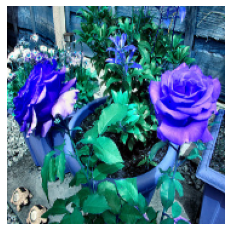

In [ ]:
plt.axis('off')
plt.imshow(x[0])

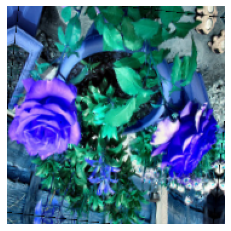

In [ ]:
plt.axis('off')
plt.imshow(data_agumentation(x)[0].numpy().astype('uint8'))

In [ ]:
num_classes = 5

model = Sequential([
                    data_agumentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(28,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Dropout(0.2),
    layers.Flatten(),
    
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])


In [ ]:
model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 1s 16ms/step - loss: 1.3685 - accuracy: 0.3946
Epoch 2/30
86/86 [==============================] - 1s 16ms/step - loss: 1.0913 - accuracy: 0.5570
Epoch 3/30
86/86 [==============================] - 1s 15ms/step - loss: 0.9742 - accuracy: 0.6028
Epoch 4/30
86/86 [==============================] - 1s 15ms/step - loss: 0.9276 - accuracy: 0.6312
Epoch 5/30
86/86 [==============================] - 1s 16ms/step - loss: 0.8725 - accuracy: 0.6650
Epoch 6/30
86/86 [==============================] - 1s 15ms/step - loss: 0.8364 - accuracy: 0.6762
Epoch 7/30
86/86 [==============================] - 1s 15ms/step - loss: 0.7974 - accuracy: 0.6824
Epoch 8/30
86/86 [==============================] - 1s 15ms/step - loss: 0.7730 - accuracy: 0.6977
Epoch 9/30
86/86 [==============================] - 1s 15ms/step - loss: 0.7484 - accuracy: 0.7140
Epoch 10/30
86/86 [==============================] - 1s 16ms/step - loss: 0.7411 - accuracy: 0.7024
Epoch 11/

In [ ]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 0s 8ms/step - loss: 0.7923 - accuracy: 0.7135


[0.7922517657279968, 0.7135076522827148]